# Max-Area Evaluation

Contrary to Min-Area, we only use the Edge-Model because it has shown to be more efficient for maximization. This simplifies the analysis.

Experiments run with a timelimit of 7200s (2hr) on algpc02

The experimentes have been executed with CPLEX, thus, we do not have the data to analyze the progress over time for the area optimization. It does not seem to be feasible, to quickly change that. However, the two different models also take up some space.

## TODO:

* The model does not seem to reach its limit. Extend it?
* Onion is missing.

In [1]:
import json
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme()
plt.rcParams.update({'figure.max_open_warning': 0
                    ,"text.usetex": True
                    ,"font.family": "serif"
                    })
sns.set_palette("tab10")
PAPER_WIDTH = 10

## Explaining the data

In [2]:
t_experiments = pd.read_json("./00_maxarea_data.json.zip")
full_techniques =  t_experiments[t_experiments["num_vertices"]==23]["sparsification_technique"].unique()
t_experiments = t_experiments[t_experiments["sparsification_technique"].isin(full_techniques)]

* **num_vertices:** The number of vertices in this instance. Most of the instances have been created in 5-steps.
* **sparsification_technique:** The used sparsification technique. The complete graph has "complete".
* **ObjVal:** The objective value of the solution (either optimal or the best at timeout).
* **filename_instance:** The file of the instance. Use this to distinguish different instances. The name also states something about its properties.
* **Runtime:** The runtime in seconds. The time limit has been 3600s.
* **Status:** The status code. 2 means solved to optimality. For sparisified instances, the instance may be solved in time but infeasible.
* **LowerBound:** The lower bound. If Status==2, it should equal the ObjVal.
* **solver:** Just the name of the solver. Not of relevance.
* **Model:** Used MIP-Model ("Edge"/"Triangle")
* **LowerBound_best:** The best known lower bound for the instance (complete graph)

In [3]:
ubs = t_experiments[t_experiments["sparsification_technique"]=="complete"].groupby("filename_instance")["UpperBound"].max()
t_experiments = pd.merge(left=t_experiments, right=ubs, left_on="filename_instance", right_index=True, suffixes=("", "_best"))

In [4]:
t_experiments

,Solved,UpperBound,id_solver,filename_solver,solver,LowerBound,Runtime,MIPGap,pointset,instance_solver,...,sparsification_technique,instance_sparsification,GRB_OUT_Incumbent,GRB_OUT_BestBd,id_instance,filename_instance,size,type,size_binned,UpperBound_best
60,True,331995.000000,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0_complete_Max_area.json,Max_area,-1,0.049182,0.0,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,...,complete,iss036e009405_medium_10_0,NaN,NaN,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,10,image_brightness,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
61,True,331995.000000,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0_complete_Max_area.json,Max_area,-1,0.049182,0.0,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,...,complete,iss036e009405_medium_10_0,NaN,NaN,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,10,image_brightness,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
62,True,331995.000000,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0_complete_Max_area.json,Max_area,-1,0.049182,0.0,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,...,complete,iss036e009405_medium_10_0,NaN,NaN,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,10,image_brightness,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
63,True,331995.000000,iss036e009405_medium_10_0_complete_Max_area,iss036e009405_medium_10_0_complete_Max_area.json,Max_area,-1,0.049182,0.0,iss036e009405_medium_10_0,iss036e009405_medium_10_0_complete,...,complete,iss036e009405_medium_10_0,NaN,NaN,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,10,image_brightness,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
110,True,312811.000000,iss036e009405_medium_10_0_delaunayT_Max_area,iss036e009405_medium_10_0_delaunayT_Max_area.json,Max_area,-1,0.013386,0.0,iss036e009405_medium_10_0,iss036e009405_medium_10_0_delaunayT,...,delaunayT,iss036e009405_medium_10_0,NaN,NaN,iss036e009405_medium_10_0,iss036e009405_medium_10_0.json,10,image_brightness,"{'closed': 'right', 'closed_left': False, 'clo...",331995.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27834,False,-1.000000,20210725_uniform_real_9_9_yao12-1_Max_area,20210725_uniform_real_9_9_yao12-1_Max_area.json,Max_area,-1,0.005928,0.0,20210725_uniform_real_9_9,20210725_uniform_real_9_9_yao12-1,...,yao12-1,20210725_uniform_real_9_9,NaN,NaN,20210725_uniform_real_9_9,20210725_uniform_real_9_9.json,9,uniform_real,"{'closed': 'right', 'closed_left': False, 'clo...",55182.661124
27831,True,55182.661124,20210725_uniform_real_9_9_yao12-2_Max_area,20210725_uniform_real_9_9_yao12-2_Max_area.json,Max_area,-1,0.023052,0.0,20210725_uniform_real_9_9,20210725_uniform_real_9_9_yao12-2,...,yao12-2,20210725_uniform_real_9_9,NaN,NaN,20210725_uniform_real_9_9,20210725_uniform_real_9_9.json,9,uniform_real,"{'closed': 'right', 'closed_left': False, 'clo...",55182.661124
27830,False,-1.000000,20210725_uniform_real_9_9_yao6-0_Max_area,20210725_uniform_real_9_9_yao6-0_Max_area.json,Max_area,-1,0.011148,0.0,20210725_uniform_real_9_9,20210725_uniform_real_9_9_yao6-0,...,yao6-0,20210725_uniform_real_9_9,NaN,NaN,20210725_uniform_real_9_9,20210725_uniform_real_9_9.json,9,uniform_real,"{'closed': 'right', 'closed_left': False, 'clo...",55182.661124
27815,False,-1.000000,20210725_uniform_real_9_9_yao6-1_Max_area,20210725_uniform_real_9_9_yao6-1_Max_area.json,Max_area,-1,0.006069,0.0,20210725_uniform_real_9_9,20210725_uniform_real_9_9_yao6-1,...,yao6-1,20210725_uniform_real_9_9,NaN,NaN,20210725_uniform_real_9_9,20210725_uniform_real_9_9.json,9,uniform_real,"{'closed': 'right', 'closed_left': False, 'clo...",55182.661124


In [5]:
t_experiments[t_experiments["UpperBound"]>1.01*t_experiments["ObjVal"]]

,Solved,UpperBound,id_solver,filename_solver,solver,LowerBound,Runtime,MIPGap,pointset,instance_solver,...,sparsification_technique,instance_sparsification,GRB_OUT_Incumbent,GRB_OUT_BestBd,id_instance,filename_instance,size,type,size_binned,UpperBound_best
2611,True,9.604433e+05,GSFC_20171208_Archive_e000256_orig_23_0_comple...,GSFC_20171208_Archive_e000256_orig_23_0_comple...,Max_area,-1,3612.180955,0.031613,GSFC_20171208_Archive_e000256_orig_23_0,GSFC_20171208_Archive_e000256_orig_23_0_complete,...,complete,GSFC_20171208_Archive_e000256_orig_23_0,NaN,NaN,GSFC_20171208_Archive_e000256_orig_23_0,GSFC_20171208_Archive_e000256_orig_23_0.json,23,image_brightness,None,9.604433e+05
5492,True,1.105714e+06,iss036e025984_large_23_0_complete_Max_area,iss036e025984_large_23_0_complete_Max_area.json,Max_area,-1,3613.639544,0.036887,iss036e025984_large_23_0,iss036e025984_large_23_0_complete,...,complete,iss036e025984_large_23_0,NaN,NaN,iss036e025984_large_23_0,iss036e025984_large_23_0.json,23,image_brightness,None,1.105714e+06
2591,True,1.898122e+05,732px-Angela_Merkel_2019_cropped_23_0_complete...,732px-Angela_Merkel_2019_cropped_23_0_complete...,Max_area,-1,3617.330605,0.061112,732px-Angela_Merkel_2019_cropped_23_0,732px-Angela_Merkel_2019_cropped_23_0_complete,...,complete,732px-Angela_Merkel_2019_cropped_23_0,NaN,NaN,732px-Angela_Merkel_2019_cropped_23_0,732px-Angela_Merkel_2019_cropped_23_0.json,23,image_edge,None,1.898122e+05
15223,True,2.057132e+05,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",Max_area,-1,3616.101661,0.068893,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",...,complete,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",NaN,NaN,"Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...","Claesz.,_Pieter_-_Still_Life_with_Musical_Inst...",23,image_edge,None,2.057132e+05
19135,True,3.822909e+05,Joe_Biden_presidential_portrait_23_0_complete_...,Joe_Biden_presidential_portrait_23_0_complete_...,Max_area,-1,3603.588841,0.012006,Joe_Biden_presidential_portrait_23_0,Joe_Biden_presidential_portrait_23_0_complete,...,complete,Joe_Biden_presidential_portrait_23_0,NaN,NaN,Joe_Biden_presidential_portrait_23_0,Joe_Biden_presidential_portrait_23_0.json,23,image_edge,None,3.822909e+05
23861,True,3.400536e+05,808px-Donald_Trump_official_portrait_23_0_comp...,808px-Donald_Trump_official_portrait_23_0_comp...,Max_area,-1,3606.980555,0.014047,808px-Donald_Trump_official_portrait_23_0,808px-Donald_Trump_official_portrait_23_0_comp...,...,complete,808px-Donald_Trump_official_portrait_23_0,NaN,NaN,808px-Donald_Trump_official_portrait_23_0,808px-Donald_Trump_official_portrait_23_0.json,23,image_edge,None,3.400536e+05
3203,True,5.467713e+00,20210902_normal_23_6_complete_Max_area,20210902_normal_23_6_complete_Max_area.json,Max_area,-1,3607.024934,0.024131,20210902_normal_23_6,20210902_normal_23_6_complete,...,complete,20210902_normal_23_6,NaN,NaN,20210902_normal_23_6,20210902_normal_23_6.json,23,normal,None,5.467713e+00
13565,True,7.679818e+00,20210902_normal_22_6_complete_Max_area,20210902_normal_22_6_complete_Max_area.json,Max_area,-1,3613.076993,0.049584,20210902_normal_22_6,20210902_normal_22_6_complete,...,complete,20210902_normal_22_6,NaN,NaN,20210902_normal_22_6,20210902_normal_22_6.json,22,normal,None,7.679818e+00
23816,True,7.201512e+00,20210902_normal_23_9_complete_Max_area,20210902_normal_23_9_complete_Max_area.json,Max_area,-1,3616.667435,0.071670,20210902_normal_23_9,20210902_normal_23_9_complete,...,complete,20210902_normal_23_9,NaN,NaN,20210902_normal_23_9,20210902_normal_23_9.json,23,normal,None,7.201512e+00
28004,True,6.716073e+00,20210902_normal_23_4_complete_Max_area,20210902_normal_23_4_complete_Max_area.json,Max_area,-1,3614.831292,0.084011,20210902_normal_23_4,20210902_normal_23_4_complete,...,complete,20210902_normal_23_4,NaN,NaN,20210902_normal_23_4,20210902_normal_23_4.json,23,normal,None,6.716073e+00


<AxesSubplot: ylabel='Frequency'>

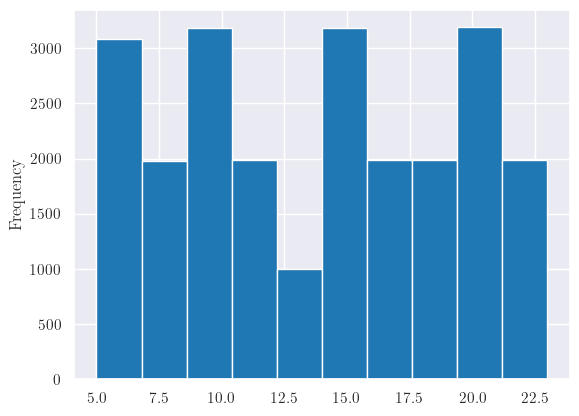

In [6]:
t_experiments["num_vertices"].plot.hist()

## 1. Feasibility

Quite a lot of sparsifications instances are rarely feasible. We again filter them out.

In [7]:
only_larger_than = 5
num_instances = t_experiments[(t_experiments["num_vertices"]>=only_larger_than)]["filename_instance"].nunique()
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
t

sparsification_technique
greedyT      0.001053
onion-1-1    0.001053
theta12-0    0.923158
theta12-1    0.929474
theta12-2    0.003158
theta6-0     0.492632
theta6-1     0.485263
theta6-2     0.036842
wspd2-3      0.021053
yao12-0      0.924211
yao12-1      0.929474
yao12-2      0.004211
yao6-0       0.473684
yao6-1       0.454737
yao6-2       0.029474
Name: filename_instance, dtype: float64

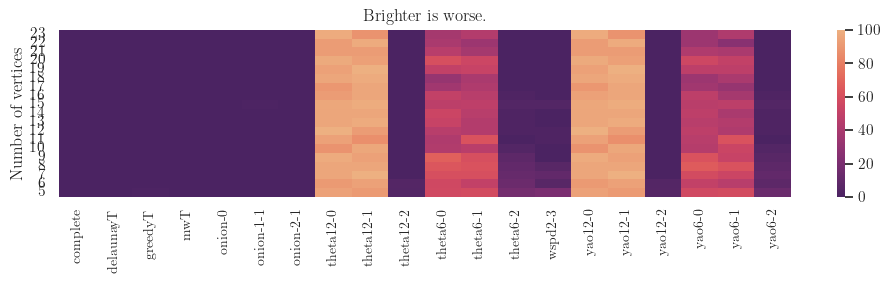

In [8]:
fig = plt.figure(figsize=(PAPER_WIDTH,3))
t = t_experiments.copy()
t["Infeasible"] = (t["Status"]==3).apply(lambda x: 100 if x else 0)
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Infeasible"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Infeasible"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, yticklabels=True)
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
plt.title("Brighter is worse.")
plt.tight_layout()
plt.savefig("./output/feasibility.pdf")
plt.show()

As we see above, the infeasible instances are relatively independent of the size and nearly identical for both models.

Let us ignore the following sparsification techniques, because more than 10% of them are infeasible

In [9]:
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
techniques_to_ignore = list(t[t>0.1].index)
techniques_to_ignore

['theta12-0',
 'theta12-1',
 'theta6-0',
 'theta6-1',
 'yao12-0',
 'yao12-1',
 'yao6-0',
 'yao6-1']

In [10]:
t_experiments_feasible = t_experiments[~t_experiments["sparsification_technique"].isin(techniques_to_ignore)]

## 2. Solution Quality

Let us next look at the solution quality because bad solutions are not useful independent of how quick we can obtain them.

We are using *best upper bound/best lower bound* as metric (all bounds computed with timeout).

In [11]:
t = t_experiments_feasible.copy()
t=t[t["Status"]!=3]
t["Gap"] = t["ObjVal"]/t["UpperBound_best"]

In [12]:
# This instance has different values for the two models (complete). This should not happen!
t_experiments[t_experiments["filename_instance"]=="20210725_normal_10_1.json"].sort_values(by="sparsification_technique")

,Solved,UpperBound,id_solver,filename_solver,solver,LowerBound,Runtime,MIPGap,pointset,instance_solver,...,sparsification_technique,instance_sparsification,GRB_OUT_Incumbent,GRB_OUT_BestBd,id_instance,filename_instance,size,type,size_binned,UpperBound_best
21971,True,2.742344,20210725_normal_10_1_complete_Max_area,20210725_normal_10_1_complete_Max_area.json,Max_area,-1,0.039039,0.0,20210725_normal_10_1,20210725_normal_10_1_complete,...,complete,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21960,True,2.364134,20210725_normal_10_1_delaunayT_Max_area,20210725_normal_10_1_delaunayT_Max_area.json,Max_area,-1,0.022112,0.0,20210725_normal_10_1,20210725_normal_10_1_delaunayT,...,delaunayT,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21957,True,2.742344,20210725_normal_10_1_greedyT_Max_area,20210725_normal_10_1_greedyT_Max_area.json,Max_area,-1,0.026101,0.0,20210725_normal_10_1,20210725_normal_10_1_greedyT,...,greedyT,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21966,True,2.742344,20210725_normal_10_1_mwT_Max_area,20210725_normal_10_1_mwT_Max_area.json,Max_area,-1,0.026758,0.0,20210725_normal_10_1,20210725_normal_10_1_mwT,...,mwT,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21958,True,2.585227,20210725_normal_10_1_onion-0_Max_area,20210725_normal_10_1_onion-0_Max_area.json,Max_area,-1,0.092377,0.0,20210725_normal_10_1,20210725_normal_10_1_onion-0,...,onion-0,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21968,True,2.742344,20210725_normal_10_1_onion-1-1_Max_area,20210725_normal_10_1_onion-1-1_Max_area.json,Max_area,-1,0.010777,0.0,20210725_normal_10_1,20210725_normal_10_1_onion-1-1,...,onion-1-1,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21961,True,2.610256,20210725_normal_10_1_onion-2-1_Max_area,20210725_normal_10_1_onion-2-1_Max_area.json,Max_area,-1,0.050058,0.0,20210725_normal_10_1,20210725_normal_10_1_onion-2-1,...,onion-2-1,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21959,False,-1.000000,20210725_normal_10_1_theta12-0_Max_area,20210725_normal_10_1_theta12-0_Max_area.json,Max_area,-1,0.005755,0.0,20210725_normal_10_1,20210725_normal_10_1_theta12-0,...,theta12-0,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21970,False,-1.000000,20210725_normal_10_1_theta12-1_Max_area,20210725_normal_10_1_theta12-1_Max_area.json,Max_area,-1,0.010325,0.0,20210725_normal_10_1,20210725_normal_10_1_theta12-1,...,theta12-1,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344
21978,True,2.604937,20210725_normal_10_1_theta12-2_Max_area,20210725_normal_10_1_theta12-2_Max_area.json,Max_area,-1,0.026650,0.0,20210725_normal_10_1,20210725_normal_10_1_theta12-2,...,theta12-2,20210725_normal_10_1,NaN,NaN,20210725_normal_10_1,20210725_normal_10_1.json,10,normal,"{'closed': 'right', 'closed_left': False, 'clo...",2.742344


In [13]:
bad_instances = t[t["Gap"]>1.01]["filename_instance"].unique()
if list(bad_instances):
    print("Removing bad instances to continue working while waiting for response.", bad_instances)
    t = t[~t["filename_instance"].isin(bad_instances)]

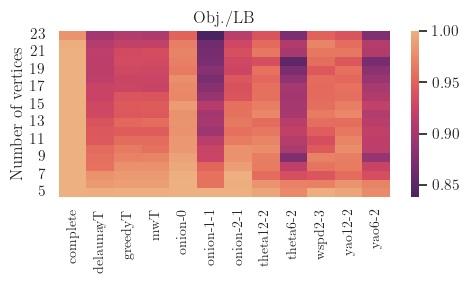

In [14]:
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Gap"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Gap"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title("Brighter is worse.")
plt.title("Obj./LB")
plt.tight_layout()
plt.savefig("./output/solution_quality_heatmap.pdf")
plt.show()

/tmp/ipykernel_1545201/1241612171.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="x", y="Gap", hue="spars", style="spars",ci=None)


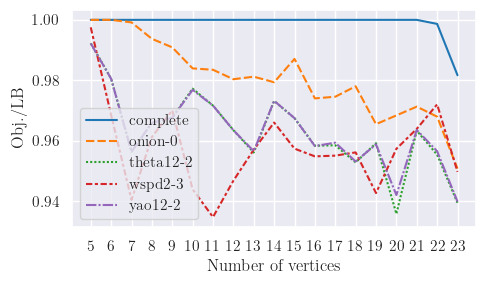

In [15]:
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
detail_sparsification_techniques = ["complete", "onion-0", "theta12-2", "wspd2-3", "yao12-2"]
t_ = t[t["sparsification_technique"].isin(detail_sparsification_techniques)].copy()
t_.rename(columns={"sparsification_technique": "spars"}, inplace=True)
t_["x"]=t_["num_vertices"].apply(lambda x: str(int(x)))
t_.sort_values(by=["num_vertices", "spars"], inplace=True)
sns.lineplot(data=t_, x="x", y="Gap", hue="spars", style="spars",ci=None)
plt.legend(title="")
plt.xlabel("Number of vertices")
#plt.title("Lower is better.")
plt.tight_layout()
plt.ylabel("Obj./LB")
plt.savefig("./output/solution_quality_lineplot.pdf")
plt.show()

There are three promising candidates: *theta12-2*, *wspd2-3*, and *yao12-2*. Theta and Yao seem to yield the same results. All three seem to decline in quality but Theta and Yao are below 5%.

## 2. Runtime

Let us next take a look on the runtime. We are comparing a lot of different strategies which are too much for a lineplot. Instead we do a heatmap that shows us, which instances could still be solved wihtin a strict time limit. Infeasible instances are considered as unsolved (they are slightly worse but in both cases we do not obtain the desired solution from the sparsification).

From this heatmap, we select a few intersting strategies for which we then also compare the concrete runtime in a lineplot.

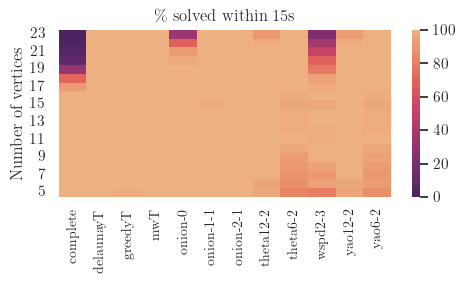

In [16]:
TIMEOUT_AFTER_S = 15
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))

t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 100)
t.loc[t["Status"]!=2, "timeout"]=0
t_ = t.groupby(["num_vertices", "sparsification_technique"])["timeout"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["timeout"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, vmin=0)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
plt.title(f"\% solved within {TIMEOUT_AFTER_S}s")
#plt.title(f"Solved within {TIMEOUT_AFTER_S}s. Brighter is better.")
plt.tight_layout()
plt.savefig("./output/runtime_heatmap.pdf")
plt.show()

/tmp/ipykernel_1545201/3107806903.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="x", y="Runtime", hue="Sparsification", style="Sparsification",ci=None)


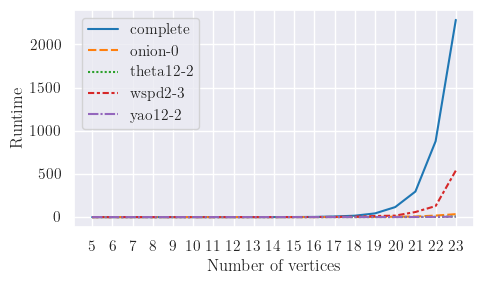

In [17]:
INTERESTING_STRATEGIES =["complete", "onion-0", "theta12-2", "wspd2-3", "yao12-2"]
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 100)
t.loc[t["Status"]!=2, "timeout"]=0
t_ = t[t["sparsification_technique"].isin(INTERESTING_STRATEGIES)].copy()
t_["x"]=t_["num_vertices"].apply(lambda x: str(int(x)))
t_.sort_values(by=["num_vertices", "sparsification_technique"], inplace=True)
t_.rename(columns={"sparsification_technique": "Sparsification"}, inplace=True)
sns.lineplot(data=t_, x="x", y="Runtime", hue="Sparsification", style="Sparsification",ci=None)
plt.legend(title="")
plt.xlabel("Number of vertices")
plt.tight_layout()
plt.savefig("./output/runtime_lineplot.pdf")
plt.show()

Not only do theta and yao yield good results, they are also extremely fast to solve. This makes some great candidates for initial solutions.